### This report is aimed to provide insights on AdventureWorks customers.

In [1]:
import numpy as np
import pyodbc
import os
from IPython.core.display import display
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core import series

Connecting to SQL Server

In [2]:
load_dotenv('credentials.env')
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER='+os.environ.get('server')+';'
    'DATABASE='+os.environ.get('database')+';'
    'UID='+ os.environ.get('uid') +';'
    'PWD='+ os.environ.get('pwd')+';')

#### 1. Overview of customers' gender.

,Customer Gender,Number Of People
0,Male,9351
1,Female,9133


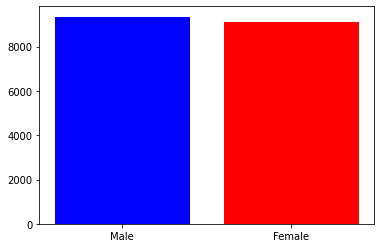

In [3]:
gender_overview = pd.read_sql("SELECT sub.[Customer Gender], COUNT(*) AS 'Number Of People' "
                              "FROM (SELECT "
                              "CASE "
                              "WHEN Gender = 'M' THEN 'Male' "
                              "WHEN Gender = 'F' THEN 'Female' "
                              "ELSE 'Not Specified' END AS 'Customer Gender' "
                              "FROM [AdventureWorks2019].[Sales].[vPersonDemographics] vp "
                              "INNER JOIN Person.Person p "
                              "ON p.BusinessEntityID = vp.BusinessEntityID "
                              "WHERE PersonType = 'IN') sub "
                              "GROUP BY SUB.[Customer Gender] "
                              "ORDER BY 'Number Of People' DESC;", conn)

display(gender_overview)
gender_overview.set_index('Customer Gender', inplace=True)
plt.bar(gender_overview.index, gender_overview['Number Of People'], color=['blue', 'red'])
plt.show()

#### 2. Overview the marital status of customers.

,Marital Status,Number Of People
0,Married,10011
1,Single,8473


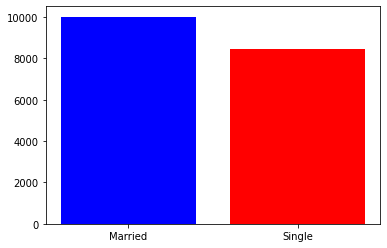

In [4]:
marital_status = pd.read_sql("SELECT sub.[Marital Status], COUNT(*) AS 'Number Of People' "
                             "FROM "
                             "(SELECT "
                             "CASE "
                             "WHEN MaritalStatus = 'M' THEN 'Married' "
                             "WHEN MaritalStatus = 'S' THEN 'Single' "
                             "ELSE 'Not Specified' END AS 'Marital Status' "
                             "FROM [AdventureWorks2019].[Sales].[vPersonDemographics] vp "
                             "INNER JOIN Person.Person p "
                             "ON p.BusinessEntityID = vp.BusinessEntityID "
                             "WHERE PersonType = 'IN') sub "
                             "GROUP BY sub.[Marital Status] "
                             "ORDER BY 'Number Of People' DESC;", conn)

display(marital_status)
marital_status.set_index('Marital Status', inplace=True)
plt.bar(marital_status.index, marital_status['Number Of People'], color=['blue', 'red'])
plt.show()

#### 3. Examine the number of kids in a household.


,Total Children,Number Of Kids
0,No kids,5165
1,2 kids,3779
2,1 kid,3619
3,4 kids,2303
4,3 kids,2194
5,5 & more kids,1424


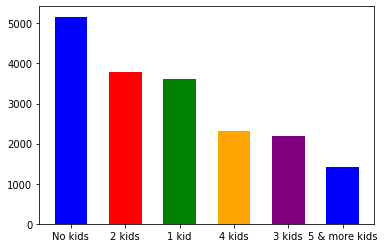

In [5]:
kids_in_household = pd.read_sql("WITH customers_with_children AS "
                                "(SELECT TotalChildren, "
                                "CASE "
                                "WHEN TotalChildren = 0 THEN 'No kids' "
                                "WHEN TotalChildren = 1 THEN '1 kid' "
                                "WHEN TotalChildren = 2 THEN '2 kids' "
                                "WHEN TotalChildren = 3 THEN '3 kids' "
                                "WHEN TotalChildren = 4 THEN '4 kids' "
                                "WHEN TotalChildren <= 5 THEN '5 & more kids' "
                                "ELSE 'Not Specified' END AS 'Total Children' "
                                "FROM [AdventureWorks2019].[Sales].[vPersonDemographics] vp "
                                "INNER JOIN Person.Person p "
                                "ON p.BusinessEntityID = vp.BusinessEntityID "
                                "WHERE PersonType = 'IN') "
                                "SELECT [Total Children], COUNT(TotalChildren) AS 'Number Of Kids' "
                                "FROM customers_with_children "
                                "GROUP BY [Total Children] "
                                "ORDER BY 'Number Of Kids' DESC;", conn)

display(kids_in_household)
kids_in_household.set_index('Total Children', inplace=True)
plt.bar(kids_in_household.index, kids_in_household['Number Of Kids'], width=0.6, color=['blue', 'red', 'green', 'orange', 'purple'])
plt.show()

#### 4. Evaluate the yearly income among customers.

,YearlyIncome,TotalCount
0,25001-50000,5704
1,50001-75000,5476
2,0-25000,2922
3,75001-100000,2755
4,greater than 100000,1627


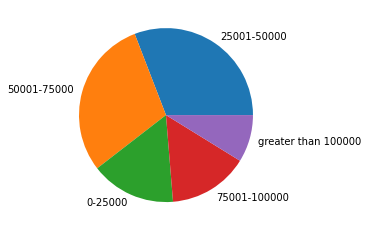

In [6]:
yearly_income = pd.read_sql("SELECT DISTINCT(YearlyIncome), COUNT(*) AS TotalCount "
                            "FROM [AdventureWorks2019].[Sales].[vPersonDemographics] vp "
                            "INNER JOIN Person.Person p "
                            "ON p.BusinessEntityID = vp.BusinessEntityID "
                            "WHERE PersonType = 'IN' "
                            "GROUP BY YearlyIncome "
                            "ORDER BY TotalCount DESC;", conn)

display(yearly_income)
yearly_income.set_index('TotalCount', inplace=True)
plt.pie(yearly_income.index, labels=yearly_income['YearlyIncome'])
plt.show()

#### 5. Examine how many of AdventureWorks customers own a home.

,Home Ownership,Number Of People
0,Home Owner,12502
1,Not A Home Owner,5982


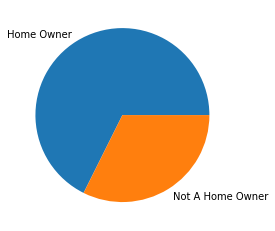

In [7]:
home_ownership = pd.read_sql("SELECT sub.[Home Ownership], COUNT(*) 'Number Of People' "
                             "FROM "
                             "(SELECT "
                             "CASE "
                             "WHEN HomeOwnerFlag = 1 THEN 'Home Owner' "
                             "WHEN HomeOwnerFlag = 0 THEN 'Not A Home Owner' "
                             "ELSE 'Not Specified' END AS 'Home Ownership' "
                             "FROM [AdventureWorks2019].[Sales].[vPersonDemographics] vp "
                             "INNER JOIN Person.Person p  "
                             "ON p.BusinessEntityID = vp.BusinessEntityID "
                             "WHERE PersonType = 'IN') sub "
                             "GROUP BY [Home Ownership];", conn)

display(home_ownership)
home_ownership.set_index('Number Of People', inplace=True)
plt.pie(home_ownership.index, labels=home_ownership['Home Ownership'])
plt.show()